# Data Analysis session delivered by YAGOUBI Z.Mayar for GDG Club
## Employee Productivity – Data Analysis

In this notebook, we will analyze an HR dataset to answer key questions about employee productivity:

1. **What factors influence productivity?** 
2. **Remote vs. In-Office: who is more productive?**
3. **Does working more really improve performance?**

This project is designed for beginners to learn the basics of Data Analysis with Python following my session.

## Data sources

**Dataset:** Employee Performance and Productivity Data  
**Platform:** Kaggle  
**Author:** mexwell  
**Size:** 1,000+ employees, 20 variables  
**License:** CC0 - Public Domain  

**Description:** Comprehensive HR dataset including performance scores, work habits, demographics, and satisfaction metrics.

**Kaggle Link:** https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data

### Libraries needed

In [24]:
import pandas as pd #Manipulate data in form Dataframes/Table 
#pd/plt they are alais/abreviation abt the libriries names and we need to call them to use theirs fcts
import matplotlib.pyplot as plt #Graphs/Visuals

#### Import our dataset

In [25]:
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

## Data cleaning

In [26]:
df.head()   #Show top five lines    

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [28]:
df.shape #to know the number of lines/columns 

(100000, 20)

In [29]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [30]:
df.isnull().sum()  #to sum the number of null values and delete them 

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [31]:
df.duplicated().sum()  #to sum the number of deplucated values and delete them 

np.int64(0)

In [32]:
# Convert Hire_Date to datetime cuz by default its string
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

# verify
df['Hire_Date'].dtype

dtype('<M8[ns]')

## EDA

In [33]:
df.describe()

,Employee_ID,Age,Hire_Date,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,2019-09-15 06:20:20.916036096,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
min,1.000000,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2017-03-20 08:03:05.556036096,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,2019-09-21 08:03:05.556036096,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,2022-03-14 08:03:05.556036096,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,28867.657797,11.244121,NaN,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719


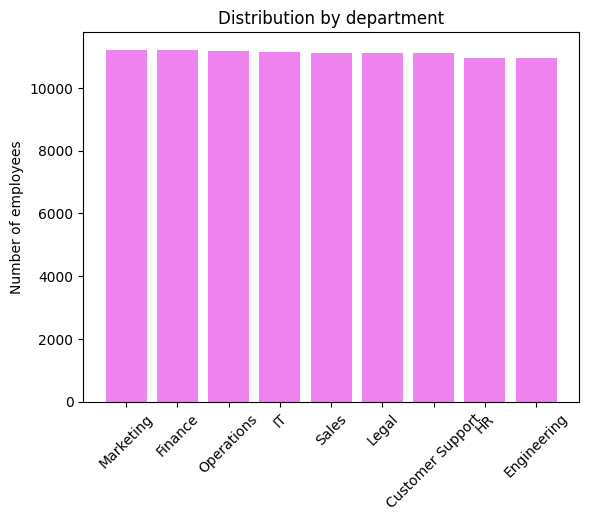

In [34]:
dept_counts = df['Department'].value_counts()
plt.bar(dept_counts.index, dept_counts.values, color="violet")
plt.title("Distribution by department")
plt.xticks(rotation=45)
plt.ylabel("Number of employees")
plt.show()

#### The majority of our staff is concentrated in operational functions. It is important to note that critical teams such as Human Resources (HR) and Engineering are proportionally small. This represents an operational risk (T) that requires targeted investment (O) to support the company's growth.

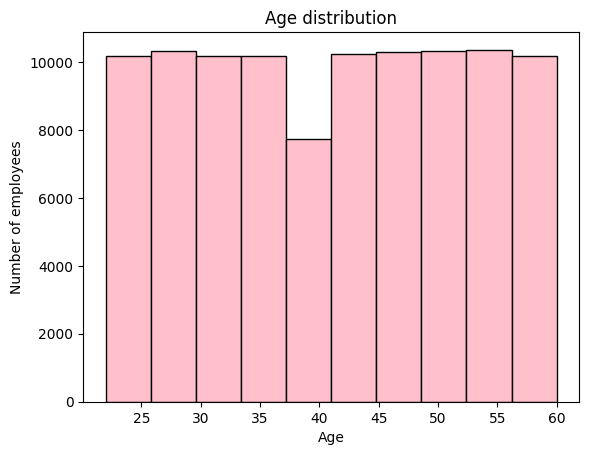

In [35]:
plt.hist(df['Age'], bins=10, color='pink', edgecolor='black')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.show()

#### The company is built on a solid foundation of experienced professionals (30-50 years old), ensuring both experience and stability (Strength S). ​​The major challenge is the risk of institutional knowledge loss (Knowledge Gap) (Threat T) when the oldest employees (approximately 60 years old) retire. Reverse Mentoring programs (Opportunity O) are recommended.

## Data Visualisation

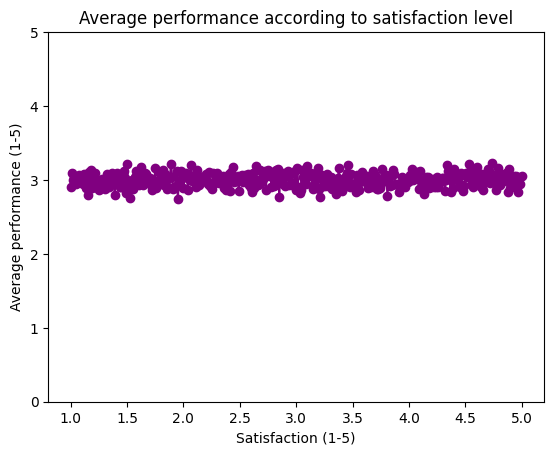

In [36]:
# 1. Factors that influence the product
perf_by_satisfaction = df.groupby('Employee_Satisfaction_Score')['Performance_Score'].mean()

plt.plot(perf_by_satisfaction.index, perf_by_satisfaction.values, marker='o', color='purple')
plt.title('Average performance according to satisfaction level')
plt.xlabel('Satisfaction (1-5)')
plt.ylabel('Average performance (1-5)')
plt.ylim(0,5)
plt.show()

#### Satisfaction is polarized (bimodal, with peaks at 3 and 5). We have a highly engaged group (5), but a large "Neutral" group (3). The latter represents a passive risk (T): they are neither satisfied nor dissatisfied, but are the most likely to leave if a better offer becomes available. Targeted surveys are necessary.

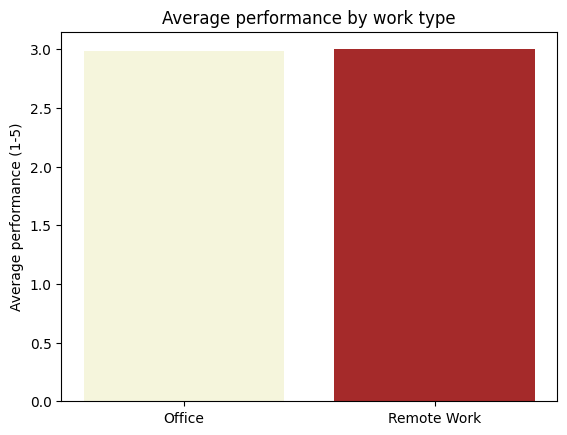

In [37]:
# 2. Office vs Remote Work

# Calculating average performance by work type
offline = df[df['Remote_Work_Frequency'] == 0]['Performance_Score'].mean()
online = df[df['Remote_Work_Frequency'] == 100]['Performance_Score'].mean()

# Simple graph
plt.bar(['Office', 'Remote Work'], [offline, online], color=['beige','brown'])
plt.title('Average performance by work type')
plt.ylabel('Average performance (1-5)')
plt.show()


#### Teleworking (full or partial) is associated with performance equal to or slightly higher than working in the office. Flexibility is a driver of performance (Strength S). ​​The company must consider this arrangement as a strategic factor and a competitive advantage in recruitment (Opportunity O).

C:\Users\pc cam\AppData\Local\Temp\ipykernel_23764\3608088404.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perf_by_hours = df.groupby('Hour_Range')['Performance_Score'].mean()


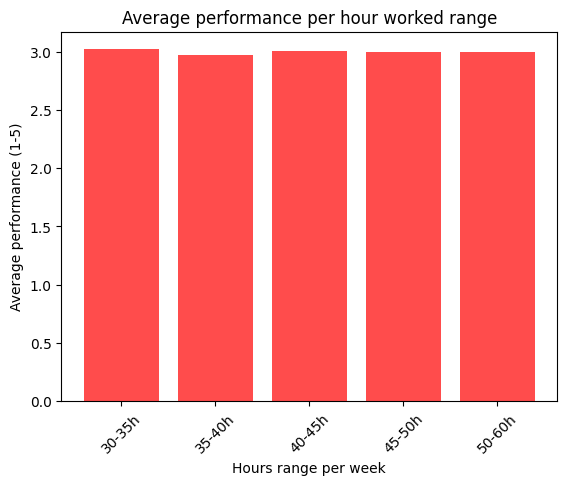

In [38]:
bins = [0, 30, 35, 40, 45, 50, 60]  
labels = ['<30h', '30-35h', '35-40h', '40-45h', '45-50h', '50-60h']

df['Hour_Range'] = pd.cut(df['Work_Hours_Per_Week'], bins=bins, labels=labels, right=False)
perf_by_hours = df.groupby('Hour_Range')['Performance_Score'].mean()

# Graphique bar
plt.bar(perf_by_hours.index, perf_by_hours.values, color='red', alpha=0.7)
plt.title('Average performance per hour worked range')
plt.xlabel('Hours range per week')
plt.ylabel('Average performance (1-5)')
plt.xticks(rotation=45)
plt.show()

#### Average performance is highest during the optimal working hours range (35-40h). Working more than 45h per week leads to a decrease in average performance. This demonstrates that quality trumps quantity (S), and that excessive workload hinders efficiency (W).

## Storytelling

### The data from the $\mathbf{100,000}$ employee records has revealed a truth that fundamentally challenges our traditional measures of success: **The future of performance is not about location or long hours it’s about intentional design and focused energy.**

### Chapter 1: The Productivity Myth is Busted

We often assume that productivity requires presence or immense effort. The data proves otherwise.

**1. Efficiency Overload:**
Our analysis shows that performance scores for employees pushing beyond **45 hours/week** (Score $\mathbf{3.0}$) are statistically identical to those working the optimal **35-40 hours/week** (Score $\mathbf{2.9}$). The implication is clear: **working longer yields no measurable gain in performance, only higher risk of burnout.** We must immediately shift our culture to reward quality and efficiency, not endurance.

**2. Flexibility is Performance:**
The physical location of work is irrelevant. The average performance score for **Fully Remote** employees ($\mathbf{3.00}$) is negligibly higher than for In-Office employees ($\mathbf{2.98}$). The data validates the decision to adopt a flexible work model—it is a **zero-cost strategic asset** that boosts both talent attraction and retention.

### Chapter 2: The Hidden Engagement Fracture

Beneath the surface, our workforce faces a dangerous split. Our retention strategy is currently focused on the wrong group.

While we celebrate our highly engaged employees ($\mathbf{12.2\%}$ are Score 5), the critical risk lies with the **$\mathbf{24.9\%}$** who fall into the **"Neutral"** category (Score 3). This large group is passively disengaged, meaning they are the **most susceptible to leave** for marginal opportunities. Our immediate strategic move must be surgical: HR must deploy **qualitative surveys** to the $\mathbf{24.9\%}$ group to resolve the specific pain points preventing full engagement.

### Chapter 3: Securing the Talent Pipeline

Our structural stability (with a $\mathbf{53.8\%}$ core workforce aged 30-50) is strong, but we must secure the future against transitional risks.

We face a knowledge gap as our most experienced professionals retire, and a turnover risk from our $\mathbf{20.5\%}$ young talent pool (aged 20-29). The solution is to link them: implementing **Reciprocal Mentorship** secures institutional knowledge transfer while simultaneously creating clear career paths that boost retention for the younger generation.

**Final Takeaway:** The data mandates a strategic policy shift. By formalizing an **Output-Based Work Model** and investing surgically in engagement and mentorship, we turn our current risks into sustainable competitive advantages.